# Pylops - visualizing linear operators

### Author: M.Ravasi

The aim of this notebook is to use the `dense()` method of the `LinearOperator` class and display the equivalent dense matrix representation of PyLops operators.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import pylops

from scipy.sparse import csr_matrix, vstack, rand
from scipy.linalg import lstsq, solve, pinv
from scipy.sparse.linalg import LinearOperator as spLinearOperator
from scipy.sparse.linalg import cg, lsqr

from pylops import LinearOperator
from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.utils.seismicevents        import *
from pylops.basicoperators             import *
from pylops.signalprocessing             import *
from pylops.waveeqprocessing.mdd       import *
from pylops.optimization.leastsquares  import *
from pylops.optimization.sparsity  import IRLS as IRLSpylops
from pylops.optimization.sparsity  import FISTA, SPGL1

### MatrixMult

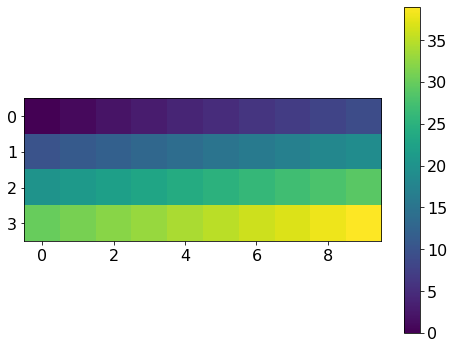

In [2]:
Mop = MatrixMult(np.arange(40).reshape(4, 10))
M = Mop.todense()

plt.figure()
plt.imshow(M);
plt.colorbar();

We now test various overloads (.H, +, -, *,, ...)

<class 'pylops.linearoperator.LinearOperator'>
<class 'pylops.linearoperator.LinearOperator'>
<class 'pylops.linearoperator.LinearOperator'>
<class 'pylops.linearoperator.LinearOperator'>
<class 'pylops.linearoperator.LinearOperator'>
<class 'pylops.linearoperator.LinearOperator'>


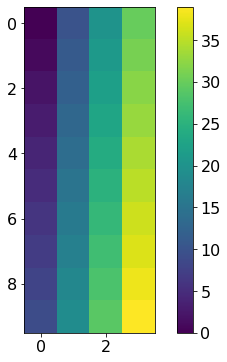

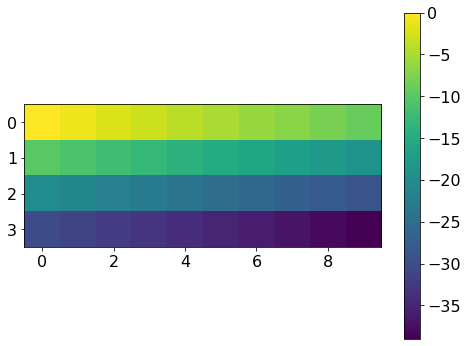

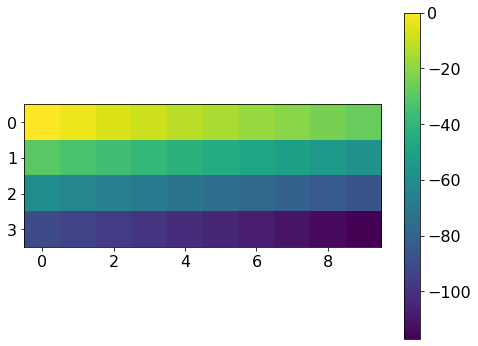

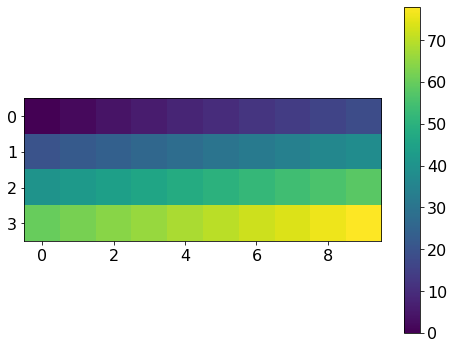

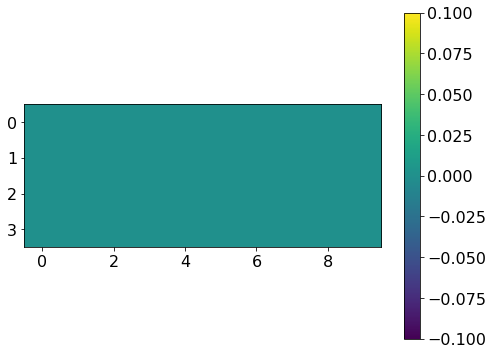

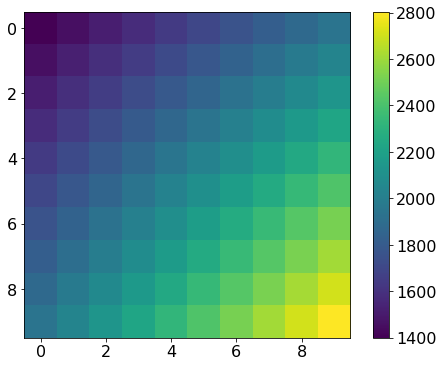

In [3]:
Mop = MatrixMult(np.arange(40).reshape(4, 10))
M = Mop.todense()

# .H
Mop1 = Mop.H
M1 = Mop1.todense()
print(type(Mop1))

plt.figure()
plt.imshow(M1)
plt.colorbar();

# .T (there was a bug until 1.4.0rc1)
#Mop1 = Mop.T
#M1 = Mop1.todense()
#print(type(Mop1))

#plt.figure()
#plt.imshow(M1)
#plt.colorbar();

# negate
Mop1 = - Mop
M1 = Mop1.todense()
print(type(Mop1))

plt.figure()
plt.imshow(M1)
plt.colorbar();

# multiply scalar
Mop1 = -3 * Mop
M1 = Mop1.todense()
print(type(Mop1))

plt.figure()
plt.imshow(M1)
plt.colorbar();

# +
Mop1 = Mop + Mop
M1 = Mop1.todense()
print(type(Mop1))

plt.figure()
plt.imshow(M1)
plt.colorbar();

# -
Mop1 = Mop - Mop
M1 = Mop1.todense()
print(type(Mop1))

plt.figure()
plt.imshow(M1)
plt.colorbar();

# *
Mop1 = Mop.H * Mop
M1 = Mop1.todense()
print(type(Mop1))

plt.figure()
plt.imshow(M1)
plt.colorbar();

### Identity

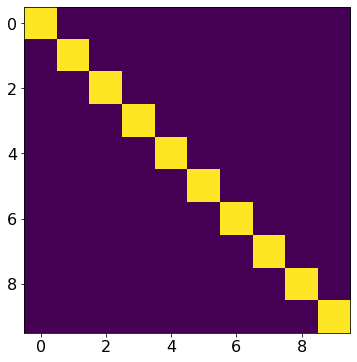

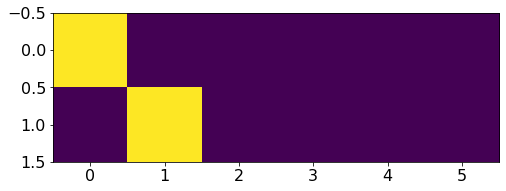

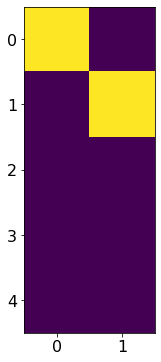

In [4]:
Iop = Identity(10)
I = Iop.todense()
plt.figure()
plt.imshow(I)

Iop = Identity(2, 6)
I = Iop.todense()
plt.figure()
plt.imshow(I)

Iop = Identity(5, 2, inplace=True)
I = Iop.todense()
plt.figure()
plt.imshow(I);

### Zero

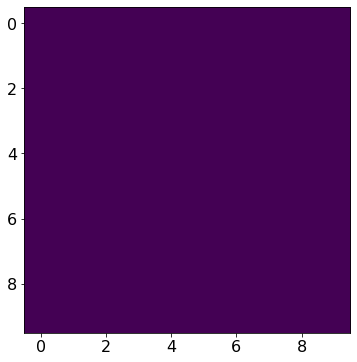

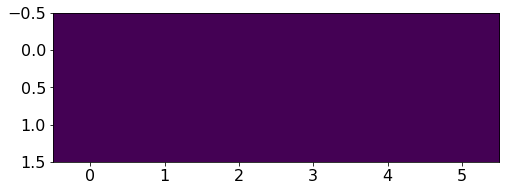

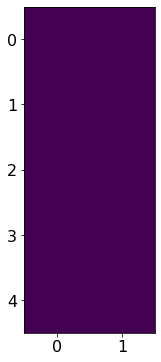

In [5]:
Zop = Zero(10)
Z = Zop.todense()
plt.figure()
plt.imshow(Z)

Zop = Zero(2, 6)
Z = Zop.todense()
plt.figure()
plt.imshow(Z)

Zop = Zero(5, 2)
Z = Zop.todense()
plt.figure()
plt.imshow(Z);

### Diagonal

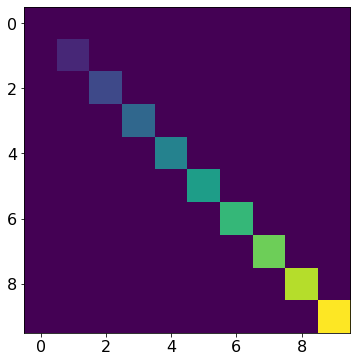

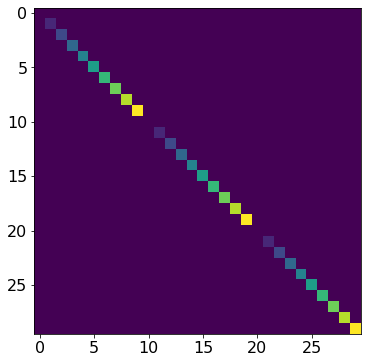

In [6]:
Dop = Diagonal(np.arange(10))
D = Dop.todense()

plt.figure()
plt.imshow(D);

Dop = Diagonal(np.arange(10), dims=(3, 10), axis=1)
D = Dop.todense()

plt.figure()
plt.imshow(D);

### Transpose

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 3 6]
 [1 4 7]
 [2 5 8]]


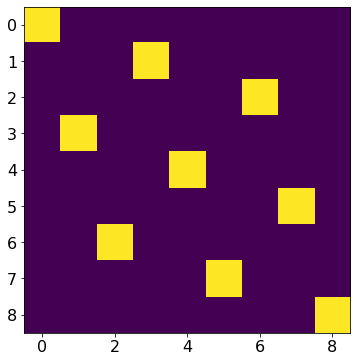

In [7]:
Top = Transpose((3, 3), (1, 0))
T = Top.todense()

plt.figure()
plt.imshow(T);

x = np.arange(9).reshape(3, 3)
y = Top * x.ravel()
print(x)
print(y.reshape(3, 3))

### Flip

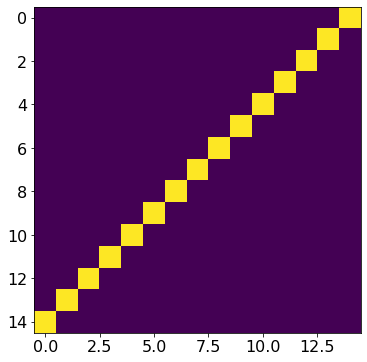

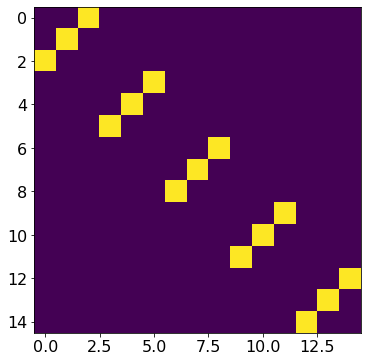

In [8]:
Fop = Flip(15)
F = Fop.todense()

plt.figure()
plt.imshow(F)

Fop = Flip((5, 3), axis=1)
F = Fop.todense()

plt.figure()
plt.imshow(F);

### Roll

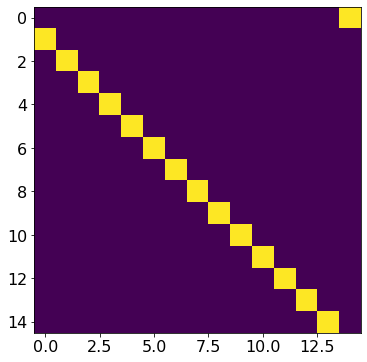

In [9]:
Rop = Roll(15)
R = Rop.todense()

plt.figure()
plt.imshow(R);

### Pad

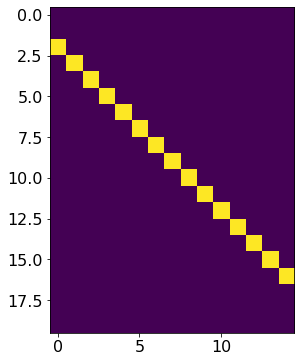

In [10]:
Pop = Pad(15, (2, 3))
P = Pop.todense()

plt.figure()
plt.imshow(P)

### Sum

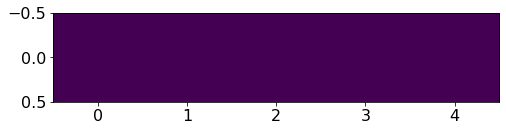

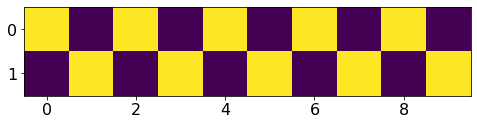

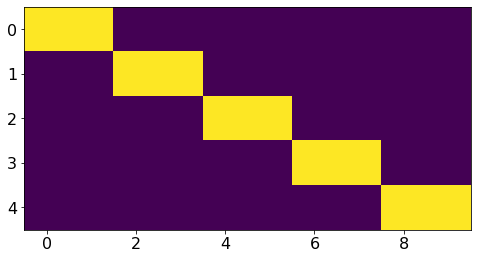

In [11]:
Sop = Sum((5, ), axis=0)
S = Sop.todense()
plt.figure()
plt.imshow(S);

Sop = Sum((5, 2), axis=0)
S = Sop.todense()
plt.figure()
plt.imshow(S);

Sop = Sum((5, 2), axis=1)
S = Sop.todense()
plt.figure()
plt.imshow(S);

### Symmetrize

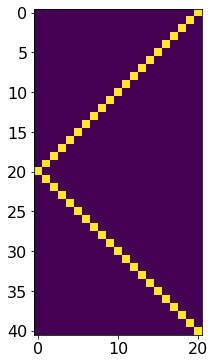

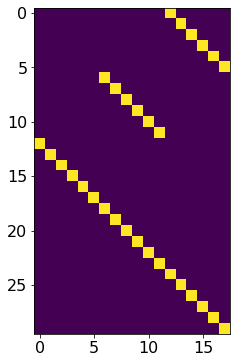

In [12]:
Sop = Symmetrize(21)
S = Sop.todense()
plt.figure()
plt.imshow(S);

Sop = Symmetrize((3, 6), axis=0)
S = Sop.todense()
plt.figure()
plt.imshow(S);

### Restriction

[ 6 10 12 18]


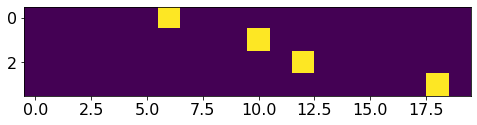

In [13]:
N = 20
Nsub = 4
iava = np.sort(np.random.permutation(np.arange(N))[:Nsub])
print(iava)

Rop = Restriction(N, iava)
R = Rop.todense()
plt.figure()
plt.imshow(R);

### Regression

/var/folders/pc/wf4mhn4n2cv8wjt_jtj8t8qhsljrkk/T/ipykernel_31753/2307439651.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.arange(nt, dtype=np.float)


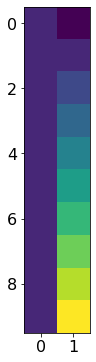

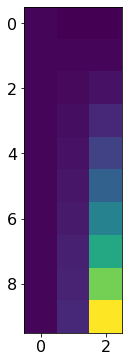

In [14]:
nt = 10
t = np.arange(nt, dtype=np.float)

Rop = Regression(t, 1)
R = Rop.todense()
plt.figure()
plt.imshow(R);


Rop = Regression(t, 2)
R = Rop.todense()
plt.figure()
plt.imshow(R);

### Causal integration

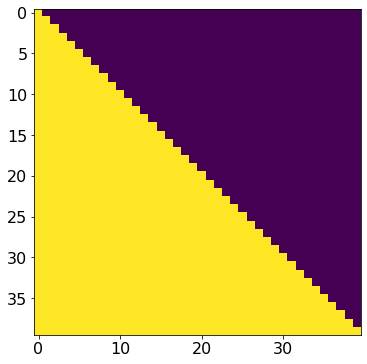

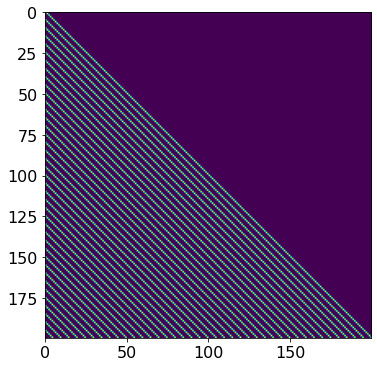

In [15]:
N = 40

Cop = CausalIntegration(N, kind='full')
C = Cop.todense()
plt.figure()
plt.imshow(C);

Cop = CausalIntegration((N, 5), axis=0, kind='full')
C = Cop.todense()
plt.figure()
plt.imshow(C);

### VStack

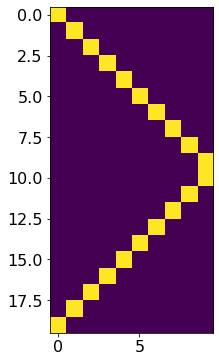

In [16]:
Op1 = Identity(10)
Op2 = Flip(10)

Vop = VStack((Op1, Op2))
V = Vop.todense()
plt.figure()
plt.imshow(V);

### HStack

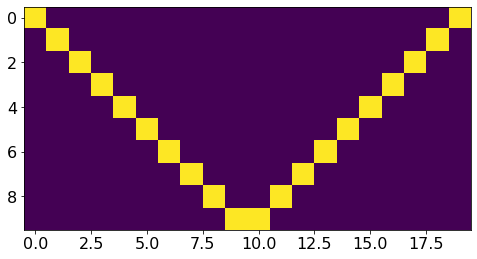

In [17]:
Op1 = Identity(10)
Op2 = Flip(10)

Hop = HStack((Op1, Op2))
H = Hop.todense()
plt.figure()
plt.imshow(H);

### Block

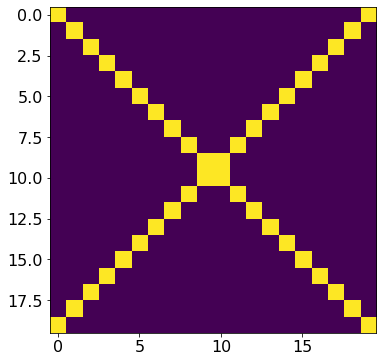

In [18]:
Op1 = Identity(10)
Op2 = Flip(10)

Bop = Block(((Op1, Op2), (Op2, Op1)))
B = Bop.todense()
plt.figure()
plt.imshow(B);

### BlockDiag

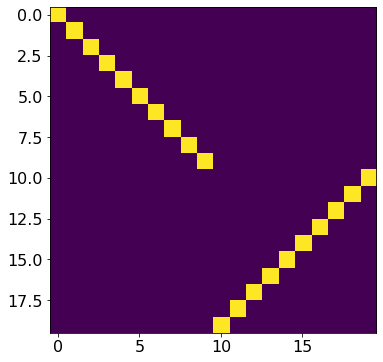

In [19]:
Bop = BlockDiag((Op1, Op2))
B = Bop.todense()
plt.figure()
plt.imshow(B);

### Kronecker

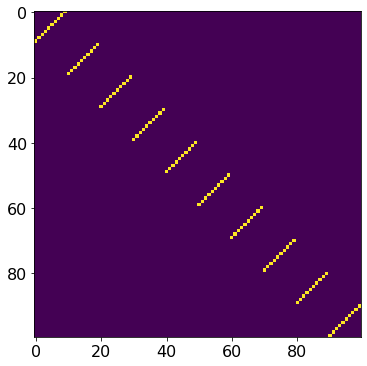

In [20]:
Kop = Kronecker(Op1, Op2)
K = Kop.todense()
plt.figure()
plt.imshow(K);

### Smoothing1D

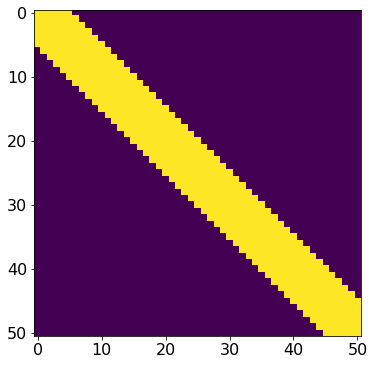

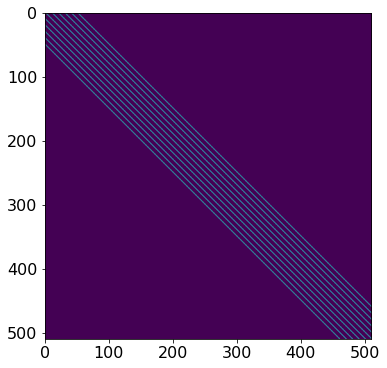

In [21]:
Sop = Smoothing1D(11, dims=(51, ))
S = Sop.todense()
plt.figure()
plt.imshow(S);

Sop = Smoothing1D(11, dims=(51, 10), axis=0)
S = Sop.todense()
plt.figure()
plt.imshow(S);

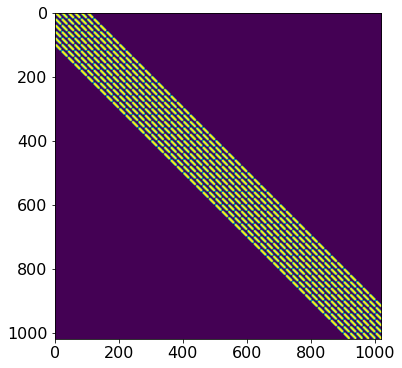

In [22]:
Sop = Smoothing2D((11, 11), dims=(51, 20))
S = Sop.todense()
plt.figure()
plt.imshow(S);

## FirstDerivative

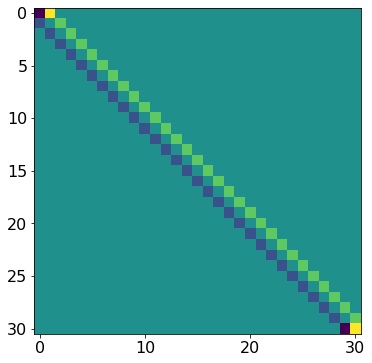

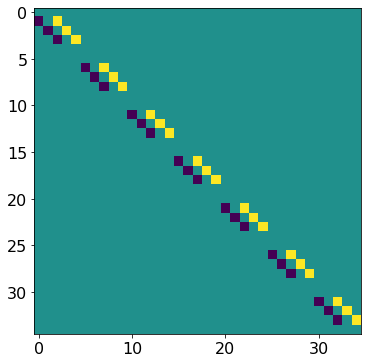

In [23]:
Dop = FirstDerivative(31, edge=True)
D = Dop.todense()
plt.figure()
plt.imshow(D)

Dop = FirstDerivative((7, 5), axis=1)
D = Dop.todense()
plt.figure()
plt.imshow(D);

### SecondDerivative

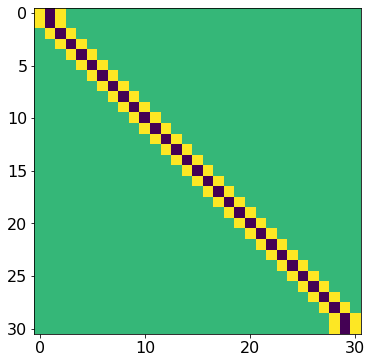

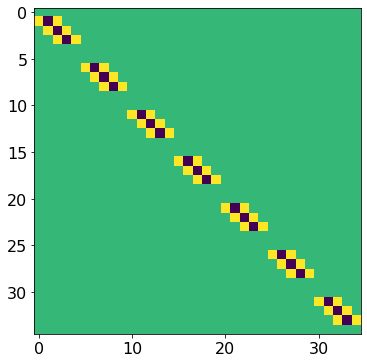

In [24]:
Dop = SecondDerivative(31, edge=True)
D = Dop.todense()
plt.figure()
plt.imshow(D)

Dop = SecondDerivative((7, 5), axis=1)
D = Dop.todense()
plt.figure()
plt.imshow(D);

### Laplacian

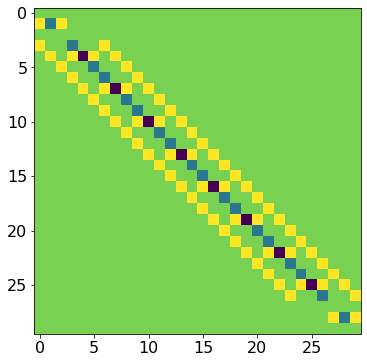

In [25]:
Dop = Laplacian((10, 3))
D = Dop.todense()
plt.figure()
plt.imshow(D)

### Gradient

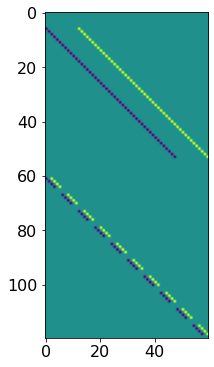

In [26]:
Dop = Gradient((10, 6))
D = Dop.todense()
plt.figure()
plt.imshow(D)

### FirstDirectionalDerivative and SecondDirectionalDerivative

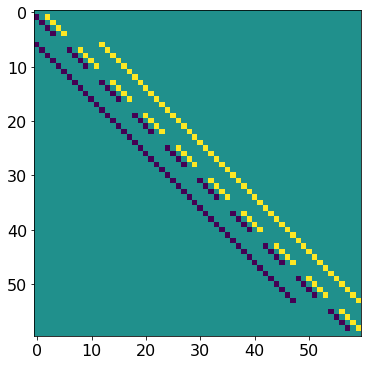

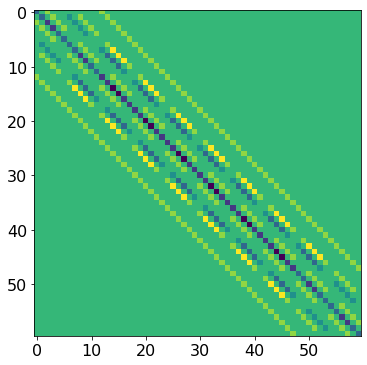

In [27]:
Gop = FirstDirectionalDerivative((10, 6), np.array([np.sqrt(2.)/2., np.sqrt(2.)/2.]))
G = Gop.todense()
plt.figure()
plt.imshow(G)

Gop = SecondDirectionalDerivative((10, 6), np.array([np.sqrt(2.)/2., np.sqrt(2.)/2.]))
G = Gop.todense()
plt.figure()
plt.imshow(G)

### FFT

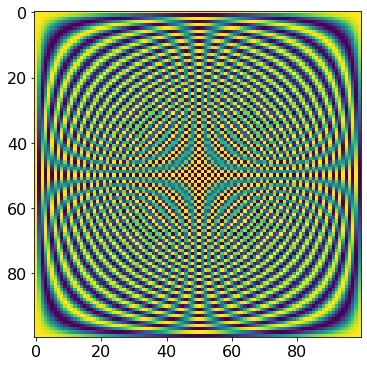

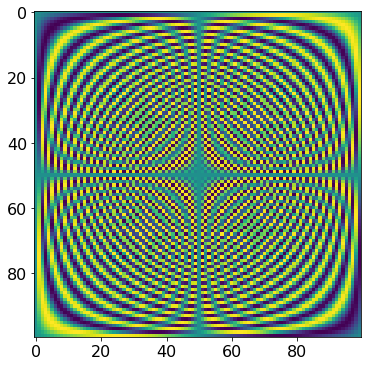

In [28]:
Fop = FFT(100, nfft=100)
F = Fop.todense()
plt.figure()
plt.imshow(np.real(F))
plt.figure()
plt.imshow(np.imag(F));

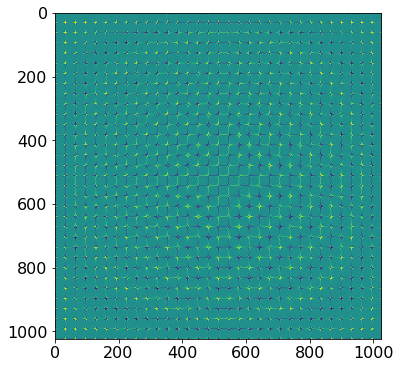

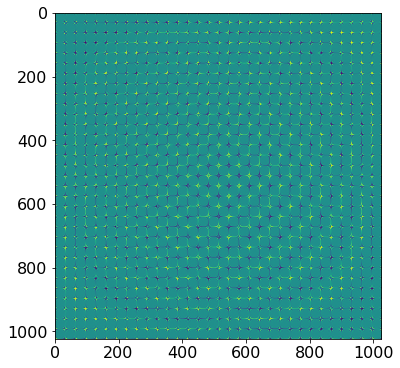

In [29]:
Fop = FFT2D((32, 32), nffts=(32, 32))
F = Fop.todense()
plt.figure()
plt.imshow(np.real(F))
plt.figure()
plt.imshow(np.imag(F));

### Convolve

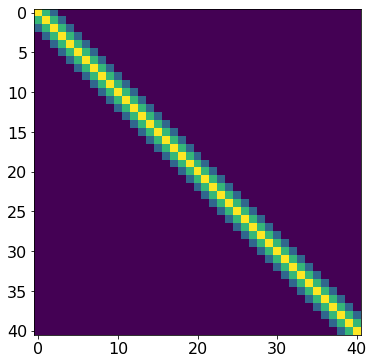

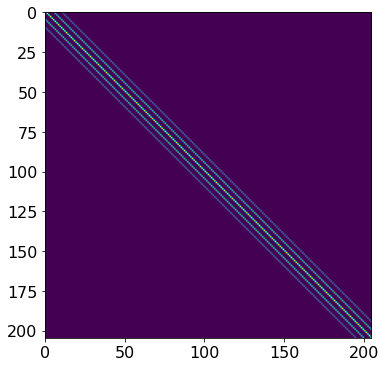

In [30]:
Cop = Convolve1D(41, sp.signal.triang(5), offset=2)
C = Cop.todense()
plt.figure()
plt.imshow(C);

Cop = Convolve1D((41, 5), sp.signal.triang(5), offset=2, axis=0)
C = Cop.todense()
plt.figure()
plt.imshow(C);

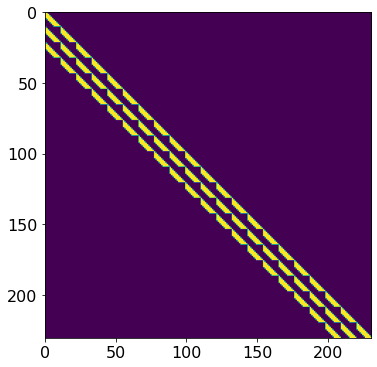

In [31]:
Cop = Convolve2D((21, 11), np.ones((3, 5)))
C = Cop.todense()
plt.figure()
plt.imshow(C);

### Interp

[ 0.3  3.3 12.3 14.3]


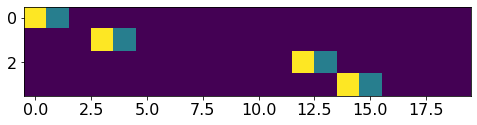

In [32]:
N = 20
Nsub = 4
iava = np.sort(np.random.permutation(np.arange(N))[:Nsub]) + 0.3
print(iava)

Iop = Interp(N, iava)[0]
I = Iop.todense()
plt.figure()
plt.imshow(I);

[[1.2 3.2 3.2]
 [3.2 1.2 0.2]]


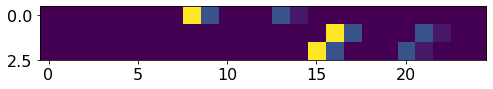

In [33]:
iava = np.array([[1, 3, 3], [3, 1, 0]]) + 0.2
print(iava)

Bop = Bilinear(iava, (5, 5))
B = Bop.todense()
plt.figure()
plt.imshow(B);